In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [84]:
data = pd.read_csv('Iris.csv')

In [85]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Only using 2 variables

Drop `SepalLengthCm` and `SepalWidthCm` cols

In [87]:
DROP_COLS = ["Id", "SepalLengthCm", "SepalWidthCm"]

In [88]:
def drop_columns(cols_name):
    data.drop(cols_name, axis=1, inplace=True)

In [89]:
drop_columns(DROP_COLS)

In [90]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [91]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Only Pick Versicolor

Nanti sisa nya akan di convert jadi Non-Versicolor

In [92]:
data["Species"][data["Species"] != "Iris-versicolor"] = "Non-versicolor"

/tmp/ipykernel_230/2584635057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Species"][data["Species"] != "Iris-versicolor"] = "Non-versicolor"


In [93]:
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Non-versicolor
1,1.4,0.2,Non-versicolor
2,1.3,0.2,Non-versicolor
3,1.5,0.2,Non-versicolor
4,1.4,0.2,Non-versicolor
...,...,...,...
145,5.2,2.3,Non-versicolor
146,5.0,1.9,Non-versicolor
147,5.2,2.0,Non-versicolor
148,5.4,2.3,Non-versicolor


In [94]:
data["Species"].value_counts()

Non-versicolor     100
Iris-versicolor     50
Name: Species, dtype: int64

### Create Visualization

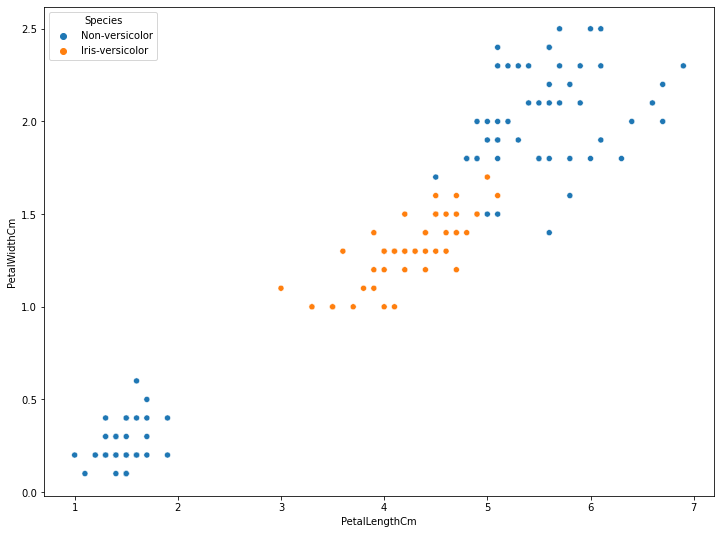

In [95]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")

plt.show()

### Split Input Output 

In [96]:
def split_input_output(data, output_col):
    X = data.drop(columns=output_col)
    y = data[output_col]
    
    return X, y

In [97]:
X, y = split_input_output(data=data,
                          output_col="Species")

In [98]:
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [99]:
X.shape

(150, 2)

In [100]:
y.head()

0    Non-versicolor
1    Non-versicolor
2    Non-versicolor
3    Non-versicolor
4    Non-versicolor
Name: Species, dtype: object

In [102]:
y.shape

(150,)

In [103]:
y.value_counts()

Non-versicolor     100
Iris-versicolor     50
Name: Species, dtype: int64

### Train Test Split 

In [104]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [130]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [131]:
y_train.value_counts()

Non-versicolor     79
Iris-versicolor    41
Name: Species, dtype: int64

In [132]:
y_test.value_counts()

Non-versicolor     21
Iris-versicolor     9
Name: Species, dtype: int64

### Preprocessing

In [124]:
X_train["PetalLengthCm"].value_counts()

1.5    11
1.4    10
1.3     6
5.1     6
4.5     5
4.0     5
4.9     4
4.4     4
1.6     4
5.0     4
5.6     4
4.2     4
1.7     3
5.7     3
4.8     3
4.1     3
4.6     3
4.7     3
6.1     3
5.5     3
1.9     2
1.2     2
5.3     2
3.3     2
6.0     2
4.3     2
6.7     2
3.5     2
5.4     2
6.3     1
3.9     1
5.2     1
5.8     1
1.0     1
1.1     1
3.0     1
3.8     1
6.6     1
3.7     1
5.9     1
Name: PetalLengthCm, dtype: int64

Apakah kita bisa Convert nya pake LabelEncoder?

In [133]:
y_train.value_counts()

Non-versicolor     79
Iris-versicolor    41
Name: Species, dtype: int64

In [143]:
y_train = y_train.apply(lambda x: 1 if x == "Iris-versicolor" else 0)
y_test = y_test.apply(lambda x: 1 if x == "Iris-versicolor" else 0)

In [144]:
y_train.value_counts()

0    79
1    41
Name: Species, dtype: int64

In [146]:
y_test.value_counts()

0    21
1     9
Name: Species, dtype: int64

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [148]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns, index = X_train.index)

In [150]:
X_train_scaled

,PetalLengthCm,PetalWidthCm
22,-1.563987,-1.309484
15,-1.277280,-1.042922
65,0.385621,0.289886
11,-1.219939,-1.309484
42,-1.391963,-1.309484
...,...,...
71,0.156255,0.156605
106,0.442962,0.689728
14,-1.449304,-1.309484
92,0.156255,0.023324


In [151]:
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X_test.columns, index = X_test.index)

In [153]:
X_test_scaled

,PetalLengthCm,PetalWidthCm
73,0.557645,0.023324
18,-1.162597,-1.176203
118,1.819157,1.489413
78,0.442962,0.423166
76,0.614987,0.289886
31,-1.277280,-1.042922
64,-0.073110,0.156605
141,0.787011,1.489413
68,0.442962,0.423166
82,0.098914,0.023324


### Modelling with Logistic Regression 

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
logreg = LogisticRegression()

In [156]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [157]:
y_pred_train_proba = logreg.predict_proba(X_train_scaled)

In [160]:
y_pred_train_proba

array([[0.82084662, 0.17915338],
       [0.80119307, 0.19880693],
       [0.61185661, 0.38814339],
       [0.74584503, 0.25415497],
       [0.78572285, 0.21427715],
       [0.64952561, 0.35047439],
       [0.62300911, 0.37699089],
       [0.75966195, 0.24033805],
       [0.77295638, 0.22704362],
       [0.73679116, 0.26320884],
       [0.63244057, 0.36755943],
       [0.65108469, 0.34891531],
       [0.58754684, 0.41245316],
       [0.82379514, 0.17620486],
       [0.75966195, 0.24033805],
       [0.61987446, 0.38012554],
       [0.51420113, 0.48579887],
       [0.53101446, 0.46898554],
       [0.61185661, 0.38814339],
       [0.62924741, 0.37075259],
       [0.61825769, 0.38174231],
       [0.41868867, 0.58131133],
       [0.62300911, 0.37699089],
       [0.77295638, 0.22704362],
       [0.3719448 , 0.6280552 ],
       [0.54785354, 0.45214646],
       [0.77295638, 0.22704362],
       [0.80546446, 0.19453554],
       [0.74965145, 0.25034855],
       [0.65419313, 0.34580687],
       [0.

In [164]:
y_pred_train = logreg.predict(X_train_scaled)

In [165]:
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [161]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [166]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.5916666666666667

In [167]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.63      0.90      0.74        79
           1       0.00      0.00      0.00        41

    accuracy                           0.59       120
   macro avg       0.32      0.45      0.37       120
weighted avg       0.42      0.59      0.49       120



Overfit? Karena gk balance class nya

In [168]:
y_pred_test_proba = logreg.predict_proba(X_test_scaled)

In [171]:
y_pred_test_proba

array([[0.49735559, 0.50264441],
       [0.75469116, 0.24530884],
       [0.42360829, 0.57639171],
       [0.62300911, 0.37699089],
       [0.53944526, 0.46055474],
       [0.80119307, 0.19880693],
       [0.71660435, 0.28339565],
       [0.73664103, 0.26335897],
       [0.62300911, 0.37699089],
       [0.64186072, 0.35813928],
       [0.66019686, 0.33980314],
       [0.75093591, 0.24906409],
       [0.78572285, 0.21427715],
       [0.73679116, 0.26320884],
       [0.78113577, 0.21886423],
       [0.6166383 , 0.3833617 ],
       [0.59564186, 0.40435814],
       [0.61348354, 0.38651646],
       [0.56448864, 0.43551136],
       [0.63084542, 0.36915458],
       [0.74584503, 0.25415497],
       [0.63870264, 0.36129736],
       [0.7891009 , 0.2108991 ],
       [0.60213646, 0.39786354],
       [0.42528311, 0.57471689],
       [0.721985  , 0.278015  ],
       [0.4753842 , 0.5246158 ],
       [0.60696097, 0.39303903],
       [0.79356515, 0.20643485],
       [0.74584503, 0.25415497]])

In [169]:
y_pred_test = logreg.predict(X_test_scaled)

In [172]:
y_pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0])

In [173]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.6333333333333333

In [174]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        21
           1       0.25      0.11      0.15         9

    accuracy                           0.63        30
   macro avg       0.47      0.48      0.46        30
weighted avg       0.56      0.63      0.58        30



### Get Coefficient and Intercept

In [175]:
logreg.coef_

array([[ 1.29493463, -0.91138701]])

In [176]:
logreg.intercept_

array([-0.69027914])

In [177]:
print('intercept ', logreg.intercept_[0])
print('classes', logreg.classes_)
pd.DataFrame({'coeff': logreg.coef_[0]}, 
             index=X.columns)

intercept  -0.6902791392926567
classes [0 1]


,coeff
PetalLengthCm,1.294935
PetalWidthCm,-0.911387


In [178]:
np.exp(1.294935)

3.650758667115514

In [179]:
np.exp(-0.911387)

0.40196630993776833

Masih bingung untuk gimana cara menghitung / buat Decision Boundary nya. Butuh cari referensi lain

In [187]:
w_1_lr, w_2_lr = logreg.coef_[0]
w_0_lr = logreg.intercept_[0]

m_lr = -w_1_lr / w_2_lr
c_lr = -w_0_lr / w_2_lr

print(m_lr, c_lr)

1.4208394586579616 -0.7573940940203358


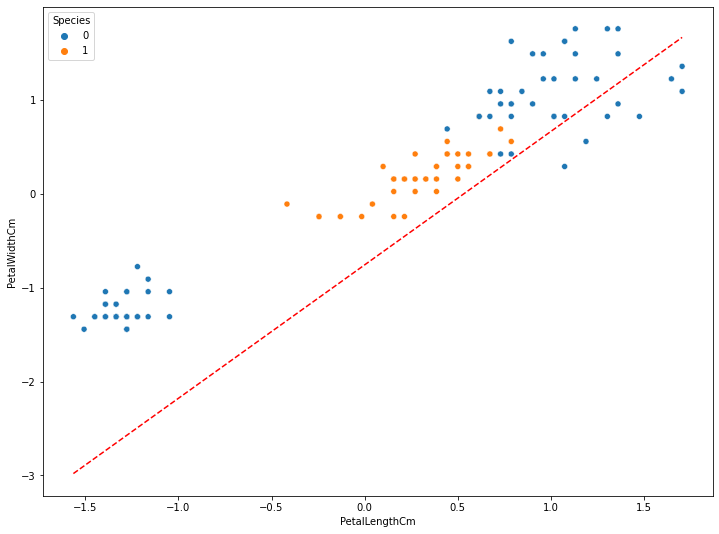

In [194]:
plt.figure(figsize=(12, 9))

data_scaled = X_train_scaled.copy()
data_scaled["Species"] = y_train

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_lr*x_support + c_lr

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

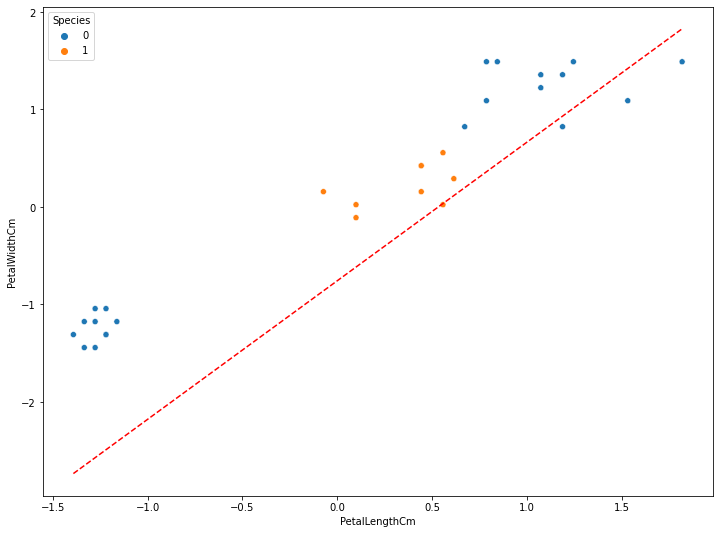

In [195]:
plt.figure(figsize=(12, 9))

data_scaled = X_test_scaled.copy()
data_scaled["Species"] = y_test

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_lr*x_support + c_lr

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()